### Chapter 3.7, pg 120

8) Simple linear regression on the Auto dataset  

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
auto = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.data', sep ='\s+')
auto.head()

%matplotlib inline 

In [2]:
## Changing the data type of horse power to int, which is caused by "?" values
auto.ix[auto.horsepower == '?', 'horsepower'] = 0
auto['horsepower'] = auto['horsepower'].astype('float')

In [67]:
auto.dtypes
# auto.horsepower.drop_duplicates()

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

** a) Predict MPG using horsepower  **

In [3]:
lm = smf.ols(formula= 'mpg ~ horsepower', data= auto).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     543.5
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           3.10e-76
Time:                        10:33:48   Log-Likelihood:                -1207.8
No. Observations:                 397   AIC:                             2420.
Df Residuals:                     395   BIC:                             2428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     38.8792      0.707     55.019      0.000        37.490    40.268
horsepower    -0.1489      0.006    -23.314      0.000        -0.161    -0.136
==============================================================================
Omnibus:                       12.157   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.244
Skew:                           0.323   Prob(JB):                     0.000807
Kurtosis:                       3.667   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Horsepower has a negative relationship with MPG, for each unit increase in horsepower there is a -0.14 decrease in MPG.  
- For a car with a horse power of 98, we could expect an MPG between 67 and 96 (allowing for the confidence interval -0.3099 to -0.0129)  
- The p-value for horsepower is statistically significant.  
- The model doesnt fit particularly well, confirmed by an r2 of 0.579.

** b) plot the response and predictor with the line of best fit ** 

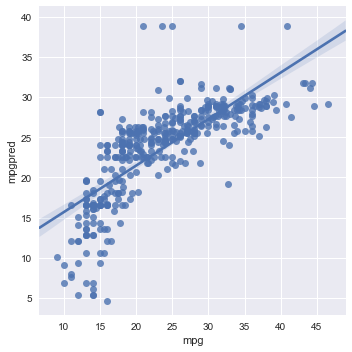

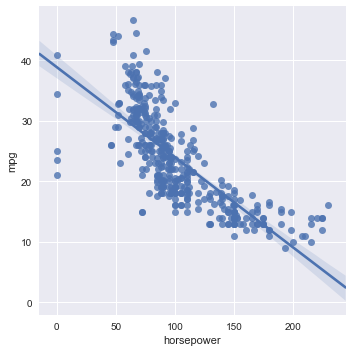

In [4]:
X = auto[['horsepower']]
auto['mpgpred'] = lm.predict(X)

sns.lmplot( 'mpg','mpgpred', auto) #, x_jitter=.5)
sns.lmplot( 'horsepower', 'mpg',auto)


The first graph shows the accuracy of the mpg prediction versus actual.  
The second graph shows the line of best fit between horsepower and mpg, it shows that the data is not strictly linear.

** c) produce diagnostic plots **   
See http://mpastell.com/2013/04/19/python_regression/ for more info on diagnostics

mean residual: 0.00000000000000334688895685487983558015549260277780205084666512172


count    397.000000
mean      23.515869
std        7.825804
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

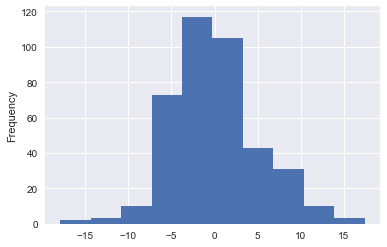

In [93]:
lm.resid.plot(kind='hist')
print('mean residual:', format(lm.resid.mean(), '.65f'))
auto.mpg.describe()

Actual MPG ranges from 9 to 46, and 1 std dev is 7.8.  Whilst the residuals above show an error of +- 15

** 9) Multiple linear regression ** 

** a) produce a scatterplot matrix of all variables in the dataset  ** 

In [80]:
num = auto.select_dtypes(include=['float64', 'int64'])

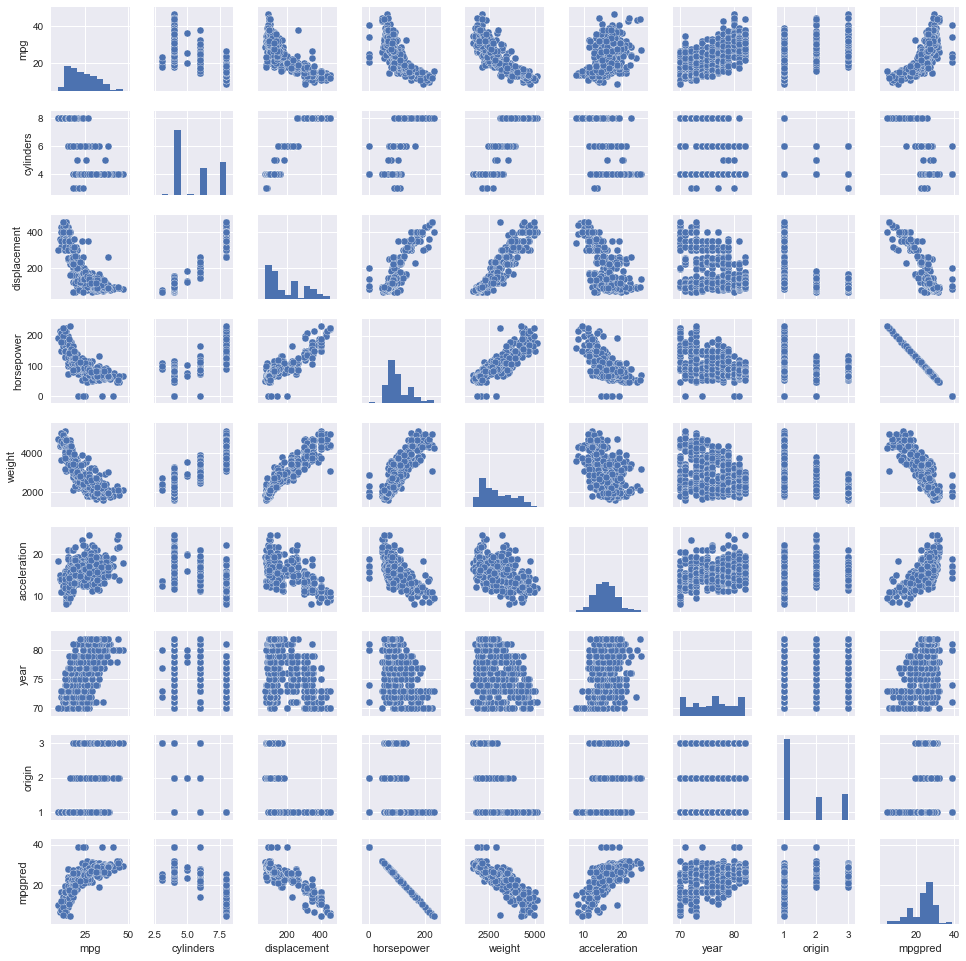

In [6]:
sns.pairplot(num, size =1.5)

** b) Compute the matrix of correlations, excluding name ** 

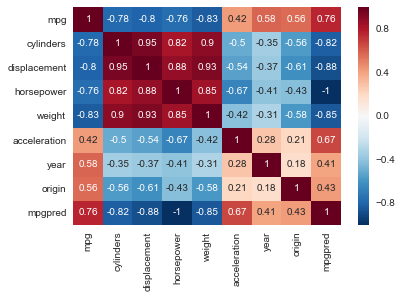

In [115]:
sns.heatmap(num.corr(), annot=True)

** c) Use multiple linear regression to predict mpg, using all predictors except for name ** 


In [81]:
X = num
y = num[['mpg']]
X.drop(['mpgpred', 'mpg'], axis=1, inplace=True)

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [82]:
lm = smf.ols(formula = 'mpg ~X', data= X.join(y)).fit() 

In [10]:
print(X.join(y).head(1).T) 
lm.summary()

                   0
cylinders        8.0
displacement   307.0
horsepower     130.0
weight        3504.0
acceleration    12.0
year            70.0
origin           1.0
mpg             18.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Tue, 11 Jul 2017   Prob (F-statistic):          1.28e-141
Time:                        10:37:40   Log-Likelihood:                -1036.8
No. Observations:                 397   AIC:                             2090.
Df Residuals:                     389   BIC:                             2121.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -17.9640      4.449     -4.038      0.000       -26.712    -9.216
X[0]          -0.4636      0.322     -1.441      0.150        -1.096     0.169
X[1]           0.0200      0.007      2.688      0.007         0.005     0.035
X[2]          -0.0149      0.011     -1.335      0.183        -0.037     0.007
X[3]          -0.0066      0.001    -10.544      0.000        -0.008    -0.005
X[4]           0.0939      0.091      1.027      0.305        -0.086     0.274
X[5]           0.7574      0.050     15.083      0.000         0.659     0.856
X[6]           1.4457      0.277      5.218      0.000         0.901     1.990
==============================================================================
Omnibus:                       30.358   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.913
Skew:                           0.513   Prob(JB):                     2.39e-11
Kurtosis:                       4.379   Cond. No.                     8.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i) There is a relationship between mpg and the predictors, origin has the largest coefficient and increases mpg 1.4 for each unit change in origin.  

ii) Acceleration, horsepower and cylinders have p-values greater than 0.05.  

iii) The more recent the year the more efficient the car becomes, for every year the mpg increases by almost 1.

** d) Produce diagnostic plots of the regression fit ** 

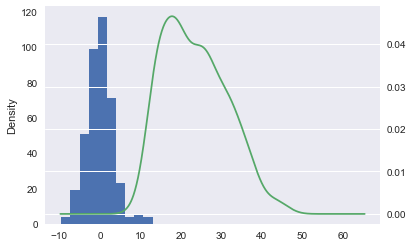

In [150]:
lm.resid.plot(kind='hist')
auto.mpg.plot(kind='density', secondary_y=True)

The residuals are more centred around 0 compared the simple regression model, however there is a potitive skew, suggesting that the model isn't able to predict mpg.  There are some observations with a high residual.

** e) Use the * and : symbols to fit linear regression with interaction effects. Do any interactions appear to be statistically significant? ** 


In [19]:
X.head(1)

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130.0,3504.0,12.0,70,1


In [41]:
lm = smf.ols(formula = 'mpg ~origin*acceleration', data= X.join(y)).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     92.77
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           2.08e-45
Time:                        12:14:19   Log-Likelihood:                -1273.3
No. Observations:                 397   AIC:                             2555.
Df Residuals:                     393   BIC:                             2571.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               3.2923      4.177      0.788      0.431        -4.919    11.504
origin                  3.8047      2.698      1.410      0.159        -1.500     9.110
acceleration            0.8102      0.267      3.031      0.003         0.285     1.336
origin:acceleration     0.0654      0.168      0.390      0.697        -0.264     0.395
==============================================================================
Omnibus:                       33.924   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.112
Skew:                           0.749   Prob(JB):                     1.95e-09
Kurtosis:                       3.428   Cond. No.                         522.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I ran the following line   
lm = smf.ols(formula = 'mpg ~X:cylinders', data= X.join(y)).fit()
Then I narrowed down X to the variables which were significant and had a larget coefficient, which suggests a larger influence/ explanation of mpg.  
I then reran the model with the 2 predictors, with and without an interaction effect to see how that adjusted the r2.



I found many combinations that were statistically signifcant (p-value <0.05)  
But none that significantly changed the models ability to explain mpg, eg/  
r2 using cylidners + origin =   0.626  
r2 plus  interaction cylinders: origin = 0.628  


** f) Try different transformations such as log(x), X2, sqrt X. Comment on your findings.**

In [83]:
## dropping horsepower which has a high P-value.
X.drop(['horsepower'], axis=1, inplace=True)


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(array([   2.,    9.,   23.,   66.,  106.,  111.,   53.,   18.,    3.,    6.]),
 array([-0.98830255, -0.78726179, -0.58622103, -0.38518026, -0.1841395 ,
         0.01690126,  0.21794202,  0.41898278,  0.62002354,  0.8210643 ,
         1.02210506]),
 <a list of 10 Patch objects>)

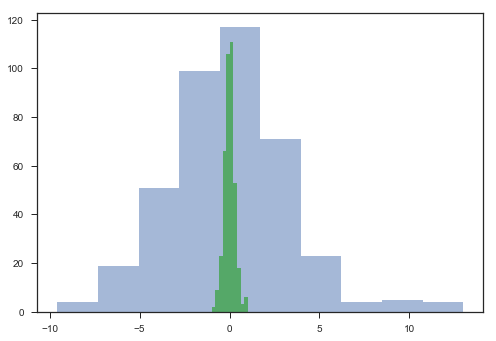

In [95]:
## Squaring 
X2 = np.square(X) 
y2 = np.square(y)

## square root 
Xsqrt = np.sqrt(X)
ysqrt = np.sqrt(y)

## logging - this errors because I think zero values can't be logged.
logX = X.apply(np.log)
logy = y.apply(np.log)

lm_sqrt = smf.ols(formula = 'mpg ~ Xsqrt', data= Xsqrt.join(ysqrt)).fit() 
lm_sqrt.summary()

plt.hist(lm.resid, alpha = 0.5,label ='orig') ## orig, grey 
plt.hist(lm_sqrt.resid) ## sqrt, green 

Squaring the predictors reduces the r2 from 0.822 to 0.705.

Taking the square root improves the explanation of mpg, to 0.864.

The graph shows the residuals of the original model and the improvement in accuracy when the square root is applied (green)

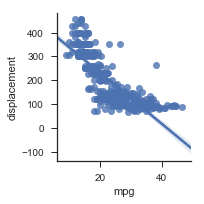

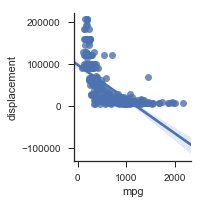

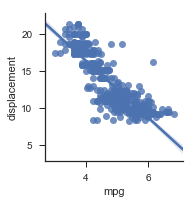

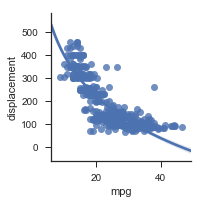

In [75]:
sqrt = Xsqrt.join(ysqrt)
sqd = X2.join(y2)
orig= X.join(y) 

sns.set(style="ticks") ## removes grid lines 

# print ('sqrt', sqrt.corr().mpg) 
# print('original', orig.corr().mpg) 

# sns.pairplot(sqrt)

# how does transforming affected the correlation between mpg and displacement?
sns.lmplot('mpg', 'displacement', orig,  size =3)
sns.lmplot('mpg', 'displacement', sqd,  size =3)
sns.lmplot('mpg', 'displacement', sqrt,  size =3)
sns.lmplot('mpg', 'displacement', orig, size = 3,logx=True)

# how does transforming affected the correlation between mpg and weight?
# sns.lmplot('mpg', 'weight', orig,  size =4)
# sns.lmplot('mpg', 'weight', sqd,  size =4)
# sns.lmplot('mpg', 'weight', sqrt,  size =4)
# sns.lmplot('mpg', 'weight', orig, size = 4,logx=True)

# how does transforming affected the correlation between mpg and acceleration?
# sns.lmplot('mpg', 'acceleration', orig,  size =4)
# sns.lmplot('mpg', 'acceleration', sqd,  size =4)
# sns.lmplot('mpg', 'acceleration', sqrt,  size =4)
# sns.lmplot('mpg', 'acceleration', orig, size = 4,logx=True)

Using "displacement" as an example, this quite clearly shows how the correlaton with MPG worsens when the values are squared (2nd chart), and improves when the values are drawn closer to zero, i.e. square root or logged.  

Rather than logging the original data, I have used the logx=True feature in the lmplot. If my understanding is correct, this adjusts the line, hence why the line is curved, rather than adjusting the data.  It has the same effect but it's interested to see how this is improving the fit.

** 10) this builds a similar multiple linear regression using carseats data, which I can't find, so I've skipped this question ** 

** 11) Investigate the t-statistic in a simple linear regression without an intercept. **   
Generate a predictor X and a response y;

In [96]:
# Convert this code to python... 

#set.seed(1)
#X=rnorm(100)
#y = 2*X+rnorm(100)